In [1]:
import celldancer as cd
import anndata
import pandas as pd
import numpy as np
import scipy as sp
import os

In [2]:
dataset = "IO_EU"
root = "/scratch/blaauw_root/blaauw1/gyichen"
adata = anndata.read_h5ad(f"{root}/data/{dataset}_pp.h5ad")

In [3]:
data_path = f"{root}/data/celldancer/{dataset}"
os.makedirs(data_path, exist_ok=True)
N, G = adata.shape
df = cd.adata_to_df_with_embed(adata,
                               cell_type_para='clusters',
                               embed_para='X_umap',
                               save_path=f"{data_path}/{dataset}.csv")
#df = pd.read_csv(f"{data_path}/{dataset}.csv")

processing:1/1000
processing:2/1000
processing:3/1000
processing:4/1000
processing:5/1000
processing:6/1000
processing:7/1000
processing:8/1000
processing:9/1000
processing:10/1000
processing:11/1000
processing:12/1000
processing:13/1000
processing:14/1000
processing:15/1000
processing:16/1000
processing:17/1000
processing:18/1000
processing:19/1000
processing:20/1000
processing:21/1000
processing:22/1000
processing:23/1000
processing:24/1000
processing:25/1000
processing:26/1000
processing:27/1000
processing:28/1000
processing:29/1000
processing:30/1000
processing:31/1000
processing:32/1000
processing:33/1000
processing:34/1000
processing:35/1000
processing:36/1000
processing:37/1000
processing:38/1000
processing:39/1000
processing:40/1000
processing:41/1000
processing:42/1000
processing:43/1000
processing:44/1000
processing:45/1000
processing:46/1000
processing:47/1000
processing:48/1000
processing:49/1000
processing:50/1000
processing:51/1000
processing:52/1000
processing:53/1000
pr

processing:417/1000
processing:418/1000
processing:419/1000
processing:420/1000
processing:421/1000
processing:422/1000
processing:423/1000
processing:424/1000
processing:425/1000
processing:426/1000
processing:427/1000
processing:428/1000
processing:429/1000
processing:430/1000
processing:431/1000
processing:432/1000
processing:433/1000
processing:434/1000
processing:435/1000
processing:436/1000
processing:437/1000
processing:438/1000
processing:439/1000
processing:440/1000
processing:441/1000
processing:442/1000
processing:443/1000
processing:444/1000
processing:445/1000
processing:446/1000
processing:447/1000
processing:448/1000
processing:449/1000
processing:450/1000
processing:451/1000
processing:452/1000
processing:453/1000
processing:454/1000
processing:455/1000
processing:456/1000
processing:457/1000
processing:458/1000
processing:459/1000
processing:460/1000
processing:461/1000
processing:462/1000
processing:463/1000
processing:464/1000
processing:465/1000
processing:466/1000


processing:834/1000
processing:835/1000
processing:836/1000
processing:837/1000
processing:838/1000
processing:839/1000
processing:840/1000
processing:841/1000
processing:842/1000
processing:843/1000
processing:844/1000
processing:845/1000
processing:846/1000
processing:847/1000
processing:848/1000
processing:849/1000
processing:850/1000
processing:851/1000
processing:852/1000
processing:853/1000
processing:854/1000
processing:855/1000
processing:856/1000
processing:857/1000
processing:858/1000
processing:859/1000
processing:860/1000
processing:861/1000
processing:862/1000
processing:863/1000
processing:864/1000
processing:865/1000
processing:866/1000
processing:867/1000
processing:868/1000
processing:869/1000
processing:870/1000
processing:871/1000
processing:872/1000
processing:873/1000
processing:874/1000
processing:875/1000
processing:876/1000
processing:877/1000
processing:878/1000
processing:879/1000
processing:880/1000
processing:881/1000
processing:882/1000
processing:883/1000


In [4]:
df_loss , df = cd.velocity(df,
                           max_epoches=200,
                           permutation_ratio=0.125,
                           n_jobs=8,
                           save_path=data_path)

Using /scratch/blaauw_root/blaauw1/gyichen/data/celldancer/IO_EU/cellDancer_velocity_2023-04-12 20-34-02 as the output path.
Arranging genes for parallel job.
1000  genes were arranged to  125  portions.



Velocity Estimation: 100%|██████████| 125/125 [08:25<00:00,  3.74s/it]
                                                                      

In [5]:
n_neigh = adata.uns['neighbors']['indices'].shape[1]
df = cd.compute_cell_velocity(cellDancer_df=df,
                              projection_neighbor_choice="gene",
                              expression_scale='power10',
                              projection_neighbor_size=n_neigh,
                              speed_up=(100, 100))

Pseudo random number generator seeds are set to:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


Generating Trajectories: 100%|██████████| 16110/16110 [00:08<00:00, 1836.82it/s]


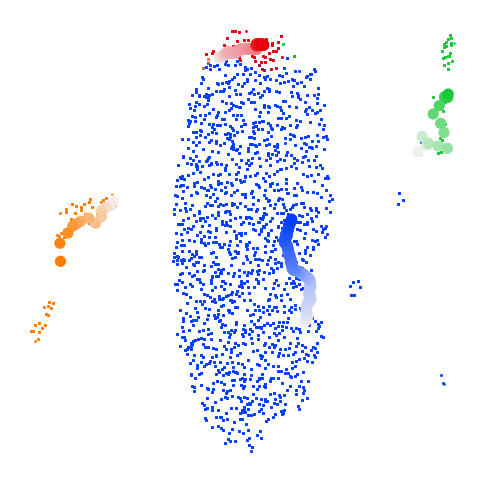

There are 4 clusters.
[0 1 2 3]


Generating Trajectories: 100%|██████████| 5390/5390 [00:03<00:00, 1622.55it/s]


--- 496.1103391647339 seconds ---


In [6]:
# estimate pseudotime
dt = 0.05
n_repeats = 10
t_total = {dt: int(10/dt)}
df = cd.pseudo_time(cellDancer_df=df,
                    grid=(30, 30),
                    dt=dt,
                    t_total=t_total[dt],
                    n_repeats=n_repeats,
                    speed_up=(100, 100),
                    n_paths=3,
                    plot_long_trajs=True,
                    psrng_seeds_diffusion=[i for i in range(n_repeats)],
                    n_jobs=8)

In [7]:
df.to_csv(f"{data_path}/{dataset}_out.csv")

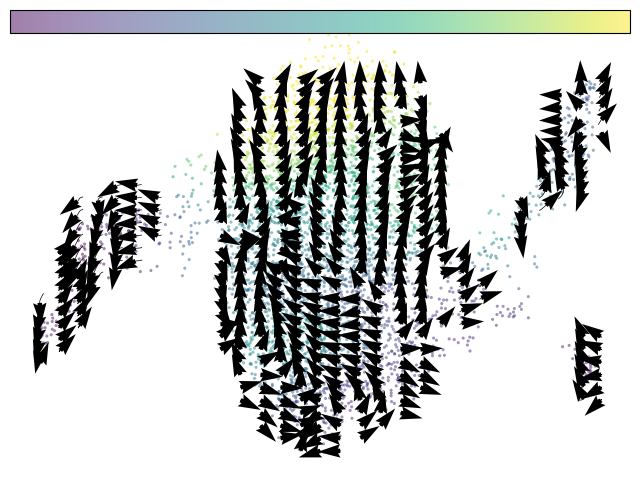

In [8]:
import matplotlib.pyplot as plt
import celldancer.cdplt as cdplt
fig, ax = plt.subplots(figsize=(8,6))
im=cdplt.scatter_cell(ax,
                      df,
                      colors='pseudotime',
                      alpha=0.5,
                      velocity=True)
ax.axis('off')
fig.savefig(f"{data_path}/cd_time_{dataset}.png")

# Save results to .h5ad file

In [2]:
dataset = "IO_EU"
root = "/scratch/blaauw_root/blaauw1/gyichen"
adata = anndata.read_h5ad(f"{root}/data/{dataset}_pp.h5ad")
df = pd.read_csv(f"{root}/data/celldancer/{dataset}/{dataset}_out.csv")

In [3]:
N, G = adata.shape

time = df["pseudotime"].to_numpy().reshape(G, N).T

adata.layers["cd_alpha"] = df["alpha"].to_numpy().reshape(G, N).T
adata.layers["cd_beta"] = df["beta"].to_numpy().reshape(G, N).T
adata.layers["cd_gamma"] = df["gamma"].to_numpy().reshape(G, N).T
adata.layers["cd_velocity_u"] = (df["unsplice_predict"].to_numpy().reshape(G, N)
                                 - df["unsplice"].to_numpy().reshape(G, N)).T
adata.layers["cd_velocity"] = (df["splice_predict"].to_numpy().reshape(G, N)
                               - df["splice"].to_numpy().reshape(G, N)).T
adata.obs["cd_time"] = time[:, 0]

data_path = f"{root}/data/celldancer/{dataset}"
adata.write_h5ad(f"{data_path}/{dataset}.h5ad")